#  **Hands-on of course 3 : Embedding**

# **PART 1 : LSA Demonstrator**

In this tutorial, you will learn how to use Latent Semantic Analysis to either discover hidden topics from given documents in an unsupervised way 
Later you'll use LSA values as a feature vectors to classify document with known document categories.

## Imports

In [4]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
!pip install gensim==4.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 53.5 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [6]:
import gensim
from gensim.test.utils import get_tmpfile
print(gensim.__version__)

4.1.2


In [7]:
#import modules
import os
import pandas as pd
import numpy as np
from string import punctuation

import nltk
from nltk import WordNetLemmatizer, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

nltk.download("stopwords")
nltk.download('punkt')
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## Preprocessing function

In [8]:
stop_words = nltk.corpus.stopwords.words("english")
stop_char = stop_words + list(punctuation)

In [9]:
def preprocessing(sentence):
    """ Basic processing of a document, word by word. 
    Outputs a list of processed tokens
    """
    # Tokenization
    tokens = word_tokenize(sentence)
    # stopwords + lowercase
    tokens = [token.lower().replace("'", "") for token in tokens if token.lower() not in stop_char]
    
    Lemmatizer = WordNetLemmatizer()
    tokens = [Lemmatizer.lemmatize(token) for token in tokens]
    
    # Deleting words with  only one caracter
    tokens = [token for token in tokens if len(token)>2]
    
    return tokens

## A. Example on few sentences

In [10]:
docA = 'I believe cats are better animals than dogs, I love cats !'
docB = 'I saw this movie named cats, it was quite bad'
docC = 'The cat jumped over the gate'

docD = 'Artificial intelligence is fun'
docE = 'Business and data science / artificial intelligence combination is the key'
docF = 'Data science is the future and data is the new black gold'
docs = [docA, docB, docC, docD, docE, docF]
docs

['I believe cats are better animals than dogs, I love cats !',
 'I saw this movie named cats, it was quite bad',
 'The cat jumped over the gate',
 'Artificial intelligence is fun',
 'Business and data science / artificial intelligence combination is the key',
 'Data science is the future and data is the new black gold']

In [11]:
import re
# We will separate each sentence into tokens
def strip_digit(tokens):
    tokens = [re.sub("\d+", "", token) for token in tokens ]
    tokens = [token for token in tokens if len(token)!=""]
    return tokens

strip_digit(["the",'code',"will", "delete", "100", "but", "not","100km"])

['the', 'code', 'will', 'delete', '', 'but', 'not', 'km']

### Preprocessing

**Question 1 : Complete the code in order to preprocess docs**


In [12]:
simple_clean_docs = []
for doc in docs: 
  ### START CODE HERE
  preprocessed_doc = preprocessing(doc)
  ### END CODE HERE
  simple_clean_docs.append(preprocessed_doc)

simple_corpus = [' '.join(sentence) for sentence in simple_clean_docs]
simple_corpus

['believe cat better animal dog love cat',
 'saw movie named cat quite bad',
 'cat jumped gate',
 'artificial intelligence fun',
 'business data science artificial intelligence combination key',
 'data science future data new black gold']

### TF-IDF vectorization
To convert text data in a document-term matrix, we are goint to use `TfidfVectorizer` from `sklearn` library

**Question 2 : Complete the code in order to apply the TF IDF vectorization to simple corpus**

In [13]:
# START CODE HERE
simple_vectorizer =  TfidfVectorizer()# Initialization of Tf IDF
simple_vect_corpus = simple_vectorizer.fit_transform(simple_corpus)# apply tfidf to simple corpus

# END CODE HERE

In [14]:
simple_dictionary = np.array(simple_vectorizer.get_feature_names())
simple_df_tfidf = pd.DataFrame(simple_vect_corpus.todense(), columns = simple_dictionary)
simple_df_tfidf.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,animal,artificial,bad,believe,better,black,business,cat,combination,data,...,intelligence,jumped,key,love,movie,named,new,quite,saw,science
0,0.38022,0.000000,0.000000,0.38022,0.38022,0.0,0.000000,0.526462,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.38022,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.427206,0.00000,0.00000,0.0,0.000000,0.295760,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.427206,0.427206,0.0,0.427206,0.427206,0.000000
2,0.00000,0.000000,0.000000,0.00000,0.00000,0.0,0.000000,0.439681,0.000000,0.000000,...,0.000000,0.635091,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.00000,0.535506,0.000000,0.00000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.535506,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.00000,0.343777,0.000000,0.00000,0.00000,0.0,0.419233,0.000000,0.419233,0.343777,...,0.343777,0.000000,0.419233,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.343777


### Singular Value Decomposition

**Question 3 : Apply SVD**

To perform Singular Value Decomposition, you can use `TruncatedSVD`. You must specify the number of topics/latent features you are expecting. Default value is set to 2. Here we will keep 2 as number of components as we are expecting to discover 2 topics regarding this corpus. Later, you'll see how to optimize this number.

In [15]:
# START CODE HERE
simple_svd =  TruncatedSVD(n_components=2) # Initialize SVD with n_components = 2
simple_lsa =  simple_svd.fit_transform(simple_df_tfidf)# Apply SVD to simple_tf_idf
# END CODE HERE

In [16]:
simple_topic_encoded_df = pd.DataFrame(simple_lsa, columns=['topic_1', 'topic_2'])
simple_topic_encoded_df['corpus'] = simple_corpus
simple_topic_encoded_df

,topic_1,topic_2,corpus
0,2.719622e-16,7.230631e-01,believe cat better animal dog love cat
1,3.579232e-16,5.828507e-01,saw movie named cat quite bad
2,1.180019e-16,6.972799e-01,cat jumped gate
3,6.570975e-01,-4.920603e-16,artificial intelligence fun
4,8.609304e-01,-3.762373e-16,business data science artificial intelligence ...
5,5.562589e-01,3.587374e-16,data science future data new black gold


### Deep dive into dictionary

In [17]:
simple_dictionary

array(['animal', 'artificial', 'bad', 'believe', 'better', 'black',
       'business', 'cat', 'combination', 'data', 'dog', 'fun', 'future',
       'gate', 'gold', 'intelligence', 'jumped', 'key', 'love', 'movie',
       'named', 'new', 'quite', 'saw', 'science'], dtype='<U12')

In [18]:
simple_encoding_matrix = pd.DataFrame(simple_svd.components_, index=['topic_1', 'topic_2'], columns=simple_dictionary).T
simple_encoding_matrix

,topic_1,topic_2
animal,5.276106e-17,2.038379e-01
artificial,4.370256e-01,-2.941006e-16
bad,1.119129e-16,1.846156e-01
believe,8.882579e-17,2.038379e-01
better,8.011572e-17,2.038379e-01
black,1.382960e-01,1.861823e-16
business,2.434768e-01,-1.603778e-16
cat,2.377143e-16,6.373608e-01
combination,2.434768e-01,-1.603778e-16
data,4.264638e-01,1.408116e-16


**Question 4 : What are the top words for each topics ?** 

In [19]:
# START CODE HERE
simple_encoding_matrix['abs_topic_1'] =  abs(simple_encoding_matrix['topic_1']) # GET ABSOLUTE VALUE OF COLUMN TOPIC 1
simple_encoding_matrix['abs_topic_2'] =  abs(simple_encoding_matrix['topic_2'])# GET ABSOLUTE VALUE OF COLUMN TOPIC 2
# END CODE HERE
simple_encoding_matrix.sort_values('abs_topic_1', ascending=False)


,topic_1,topic_2,abs_topic_1,abs_topic_2
artificial,4.370256e-01,-2.941006e-16,4.370256e-01,2.941006e-16
intelligence,4.370256e-01,-3.449048e-16,4.370256e-01,3.449048e-16
data,4.264638e-01,1.408116e-16,4.264638e-01,1.408116e-16
science,3.130591e-01,-5.137870e-18,3.130591e-01,5.137870e-18
fun,2.894720e-01,-2.294931e-16,2.894720e-01,2.294931e-16
key,2.434768e-01,-1.639470e-16,2.434768e-01,1.639470e-16
business,2.434768e-01,-1.603778e-16,2.434768e-01,1.603778e-16
combination,2.434768e-01,-1.603778e-16,2.434768e-01,1.603778e-16
new,1.382960e-01,1.889015e-16,1.382960e-01,1.889015e-16
gold,1.382960e-01,1.857822e-16,1.382960e-01,1.857822e-16


In [20]:
simple_encoding_matrix.sort_values('abs_topic_2', ascending=False)

,topic_1,topic_2,abs_topic_1,abs_topic_2
cat,2.377143e-16,6.373608e-01,2.377143e-16,6.373608e-01
jumped,1.061529e-17,3.283344e-01,1.061529e-17,3.283344e-01
gate,1.061529e-17,3.283344e-01,1.061529e-17,3.283344e-01
believe,8.882579e-17,2.038379e-01,8.882579e-17,2.038379e-01
love,8.442543e-17,2.038379e-01,8.442543e-17,2.038379e-01
better,8.011572e-17,2.038379e-01,8.011572e-17,2.038379e-01
dog,8.000230e-17,2.038379e-01,8.000230e-17,2.038379e-01
animal,5.276106e-17,2.038379e-01,5.276106e-17,2.038379e-01
named,1.403344e-16,1.846156e-01,1.403344e-16,1.846156e-01
movie,1.403344e-16,1.846156e-01,1.403344e-16,1.846156e-01


## B. On larger corpus
We will use the corpus NLTK Gutenburg that includes a small selection of texts from the Project Gutenberg electronic text archive, which contains some 25,000 free electronic books, hosted at http://www.gutenberg.org/.

We will use the two books :

1.   Alice in Wonderland of Lewis Carroll
2.   Hamlet of Shakespeare



In [21]:
nltk.download('gutenberg')
alice_raw = nltk.corpus.gutenberg.raw('carroll-alice.txt')
hamlet_raw = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


### Preprocessing

In [22]:
alice_sentences = nltk.sent_tokenize(alice_raw)

alice_sentence_clean = []
for sent in alice_sentences:
    if len(sent)>0:
        alice_sentence_clean.append(preprocessing(sent))
    
print("Number of sentences after cleaning:", len(alice_sentence_clean))
alice_sentence_clean[50]

Number of sentences after cleaning: 1625


['alice',
 'bit',
 'hurt',
 'jumped',
 'foot',
 'moment',
 'looked',
 'dark',
 'overhead',
 'another',
 'long',
 'passage',
 'white',
 'rabbit',
 'still',
 'sight',
 'hurrying']

In [23]:
hamlet_sentences = nltk.sent_tokenize(hamlet_raw)

hamlet_sentence_clean = []
for sent in hamlet_sentences:
    if len(sent)>0:
        hamlet_sentence_clean.append(preprocessing(sent))
    
print("Number of sentences after cleaning:", len(hamlet_sentence_clean))
hamlet_sentence_clean[50]

Number of sentences after cleaning: 2355


['like', 'harrowes', 'fear', 'wonder', 'barn']

### TF-IDF vectorization

In [24]:
corpus_alice = pd.concat([pd.Series((' '.join(sentence) for sentence in alice_sentence_clean), name='sentence'), 
                          pd.Series(np.ones(len(alice_sentence_clean)), name='is_Alice')], axis=1)

corpus_hamlet = pd.concat([pd.Series((' '.join(sentence) for sentence in hamlet_sentence_clean), name='sentence'), 
                          pd.Series(np.zeros(len(hamlet_sentence_clean)), name='is_Alice')], axis=1)

corpus = pd.concat([corpus_alice, corpus_hamlet]).reset_index(drop=True)

In [25]:
corpus

,sentence,is_Alice
0,alice adventure wonderland lewis carroll 1865 ...,1.0
1,rabbit-hole alice beginning get tired sitting ...,1.0
2,considering mind well could hot day made feel ...,1.0
3,nothing remarkable alice think much way hear r...,1.0
4,dear,1.0
...,...,...
3975,bid souldiers shoote,0.0
3976,exeunt,0.0
3977,marching peale ordenance shot,0.0
3978,finis,0.0


**Question 5 : Apply TF IDF to sentences in corpus**

In [26]:
vectorizer = TfidfVectorizer(min_df=3)

# START CODE HERE 
vect_corpus = vectorizer.fit_transform(corpus['sentence'])

# END CODE HERE

dictionary = np.array(vectorizer.get_feature_names())
df_tfidf = pd.DataFrame(vect_corpus.todense(), columns = dictionary)
df_tfidf.sample(5)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aboue,absurd,accident,account,across,act,acte,action,actor,added,...,year,yeare,yer,yes,yesterday,yet,yong,you,young,youth
3131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Sparsity of the matrix

**Question 6 : What is the dimension of the tf-idf matrix ? What each dimension represents ?**

In [27]:
# START CODE HERE
df_tfidf.shape
# END CODE HERE


(3980, 1784)

**Question 7 : What are the words that have in average the highest frequency in the corpus**

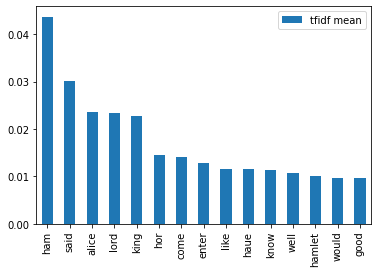

In [28]:
# START CODE HERE
df_tfidf_mean = df_tfidf.mean(axis=0)

# END CODE HERE
df_tfidf_mean = df_tfidf_mean.sort_values(ascending=False).to_frame(name='tfidf mean')
df_tfidf_mean[:15].plot(kind='bar')
plt.show()

### Singular Value Decomposition

In [29]:
svd = TruncatedSVD(n_components=2)
lsa = svd.fit_transform(df_tfidf)

**Question 8 : Show topics weights for sentences with length > 15**



In [30]:
from numpy.ma import count
topic_encoded_df = pd.DataFrame(lsa, columns=['topic_1', 'topic_2'])
topic_encoded_df['sentence'] = corpus['sentence']
topic_encoded_df['is_Alice'] = corpus['is_Alice']

# START CODE HERE
topic_encoded_df['len'] = [len(i.split()) for i in topic_encoded_df['sentence']]

# END CODE HERE
topic_encoded_df[topic_encoded_df['len']>15] # Filter on sentences with length > 15

,topic_1,topic_2,sentence,is_Alice,len
1,0.003324,0.118832,rabbit-hole alice beginning get tired sitting ...,1.0,24
2,0.005392,0.056650,considering mind well could hot day made feel ...,1.0,27
6,0.003506,0.092040,thought afterwards occurred ought wondered tim...,1.0,41
8,0.004836,0.120336,rabbit-hole went straight like tunnel way dipp...,1.0,17
10,0.005067,0.059445,first tried look make coming dark see anything...,1.0,21
...,...,...,...,...,...
3951,0.009871,0.029109,dye horatio potent poyson quite ore-crowes spi...,0.0,22
3963,0.012736,0.035968,sight dismall affaire england come late eares ...,0.0,18
3968,0.006705,0.022791,shall heare carnall bloudie vnnaturall act acc...,0.0,21
3972,0.010535,0.029452,shall haue alwayes cause speake mouth whose vo...,0.0,22


### Deep dive into Dictioniary

In [ ]:
dictionary[:10]

array(['aboue', 'absurd', 'accident', 'account', 'across', 'act', 'acte',
       'action', 'actor', 'added'], dtype='<U13')

In [ ]:
encoding_matrix = pd.DataFrame(svd.components_, index=['topic_1', 'topic_2'], columns=dictionary).T
encoding_matrix

,topic_1,topic_2
aboue,0.000075,0.001061
absurd,0.000048,0.001147
accident,0.000083,0.000748
account,0.000038,0.003518
across,0.000040,0.001627
...,...,...
yet,0.006106,0.020505
yong,0.001413,0.000789
you,0.000731,0.052436
young,0.000882,0.006004


In [ ]:
encoding_matrix['abs_topic_1'] = np.abs(encoding_matrix['topic_1'])
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['topic_2'])
encoding_matrix.sort_values('abs_topic_1', ascending=False).head(10)

,topic_1,topic_2,abs_topic_1,abs_topic_2
ham,0.965868,-0.063128,0.965868,0.063128
lord,0.244110,0.111287,0.244110,0.111287
good,0.032205,0.049687,0.032205,0.049687
hamlet,0.027000,0.025878,0.027000,0.025878
king,0.022725,0.539222,0.022725,0.539222
haue,0.021757,0.034553,0.021757,0.034553
come,0.016323,0.050776,0.016323,0.050776
sir,0.016179,0.025387,0.016179,0.025387
polon,0.011257,0.019359,0.011257,0.019359
well,0.011210,0.071661,0.011210,0.071661


In [ ]:
encoding_matrix.sort_values('abs_topic_2', ascending=False).head(10)

,topic_1,topic_2,abs_topic_1,abs_topic_2
said,0.004551,0.608740,0.004551,0.608740
king,0.022725,0.539222,0.022725,0.539222
alice,0.003195,0.411095,0.003195,0.411095
lord,0.244110,0.111287,0.244110,0.111287
like,0.008628,0.079308,0.008628,0.079308
know,0.008078,0.075738,0.008078,0.075738
enter,0.005338,0.075506,0.005338,0.075506
thought,0.003893,0.075323,0.003893,0.075323
well,0.011210,0.071661,0.011210,0.071661
ham,0.965868,-0.063128,0.965868,0.063128


### Plot topic encoded data

We are going to represent each sentence regarding the two latent features. They are colorized regarding the `is_Alice` binary variable

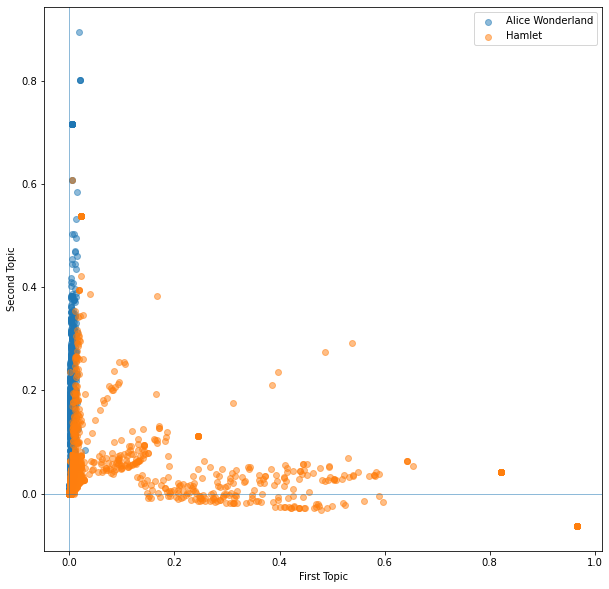

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

for val in topic_encoded_df['is_Alice'].unique():
    topic_1 = topic_encoded_df[topic_encoded_df['is_Alice']==val]['topic_1'].values
    topic_2 = topic_encoded_df[topic_encoded_df['is_Alice']==val]['topic_2'].values
    color = "red" if val else "blue"
    label= "Alice Wonderland" if val else "Hamlet"
    ax.scatter(topic_1, topic_2, alpha=0.5, label=label)
    
ax.set_xlabel('First Topic')
ax.set_ylabel('Second Topic')
ax.axvline(linewidth=0.5)
ax.axhline(linewidth=0.5)
ax.legend()

## Select the best number of components for SVD

In [ ]:
svd.explained_variance_ratio_

array([0.030914  , 0.01163473])

We will create Function Calculating Number Of Components Required To Pass Threshold. 

This function have to take in parameters a large list of explained variance ratio (number of components close from number of originally features/terms)

In [ ]:
def select_n_components(var_ratio, var_threshold):
    # Set initial variance explained so far
    total_variance = 0.0
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
    
        if total_variance >= var_threshold:
            break
            
    # Return the number of components
    return n_components

**Question 9 : Select the optimal number of components to apply SVD explaining 50% of variance**

In [ ]:
large_svd = TruncatedSVD(n_components=df_tfidf.shape[1]-1)
large_lsa = large_svd.fit_transform(df_tfidf)
# START CODE HERE
threshold = 
n_opt = 
# END CODE HERE
print(f"The optimal number of components to explain {threshold*100}% of the variance is {n_opt}")

SyntaxError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

explained_variance = pd.Series(large_svd.explained_variance_ratio_.cumsum())
explained_variance.plot()

ax.xaxis.set_ticks(np.arange(0, len(explained_variance), 100))

ax.set_xlabel('Number of Topics')
ax.set_ylabel('Percentage of explained variance')
ax.set_title('Percentage of explained variance by number of topics')

**Question 10 : Apply SVD with optimal number of component and select for the first 10 topic the top words**

In [ ]:
# START CODE HERE
optimal_svd = 
optimal_lsa = 
# END CODE HERE
optimal_encoding_matrix = pd.DataFrame(optimal_svd.components_, index=[f'topic_{i}' for i in range(n_opt)], columns=dictionary).T

In [ ]:
for i in range(10):
  # START CODE HERE
    optimal_encoding_matrix[f'abs_topic_{i}'] =  # get Absolute value of column topic i
    top_words =  # get top 5 words

    # END CODE HERE
    print(f"Top words for topic {i} are : ")
    print(top_words)
    print()
    print()

# **PART 2 : WORD2VEC**

In [ ]:
corpus_alice = pd.concat([pd.Series((' '.join(sentence) for sentence in alice_sentence_clean), name='sentence'), 
                          pd.Series(np.ones(len(alice_sentence_clean)), name='is_Alice')], axis=1)

corpus_hamlet = pd.concat([pd.Series((' '.join(sentence) for sentence in hamlet_sentence_clean), name='sentence'), 
                          pd.Series(np.zeros(len(hamlet_sentence_clean)), name='is_Alice')], axis=1)

corpus = pd.concat([corpus_alice, corpus_hamlet]).reset_index(drop=True)

In [ ]:
gensim_corpus = [corp.split(" ") for corp in corpus.sentence]
gensim_corpus

[['alice', 'adventure', 'wonderland', 'lewis', 'carroll', '1865', 'chapter'],
 ['rabbit-hole',
  'alice',
  'beginning',
  'get',
  'tired',
  'sitting',
  'sister',
  'bank',
  'nothing',
  'twice',
  'peeped',
  'book',
  'sister',
  'reading',
  'picture',
  'conversation',
  'and',
  'use',
  'book',
  'thought',
  'alice',
  'without',
  'picture',
  'conversation'],
 ['considering',
  'mind',
  'well',
  'could',
  'hot',
  'day',
  'made',
  'feel',
  'sleepy',
  'stupid',
  'whether',
  'pleasure',
  'making',
  'daisy-chain',
  'would',
  'worth',
  'trouble',
  'getting',
  'picking',
  'daisy',
  'suddenly',
  'white',
  'rabbit',
  'pink',
  'eye',
  'ran',
  'close'],
 ['nothing',
  'remarkable',
  'alice',
  'think',
  'much',
  'way',
  'hear',
  'rabbit',
  'say',
  'dear'],
 ['dear'],
 ['shall', 'late'],
 ['thought',
  'afterwards',
  'occurred',
  'ought',
  'wondered',
  'time',
  'seemed',
  'quite',
  'natural',
  'rabbit',
  'actually',
  'took',
  'watch',
  'wai

In [ ]:
len(gensim_corpus)

3980

In [ ]:
gensim_corpus[0]

['alice', 'adventure', 'wonderland', 'lewis', 'carroll', '1865', 'chapter']

__Question 11 : Create a temporary file by giving an extension and make sure you add ".model" as extension__

In [ ]:
# START CODE HERE
path = get_tmpfile('gensim.model')
# END CODE HERE

__Question 12 : Instantiate your word2vec model__

*This module implements the word2vec family of algorithms: skip-gram and CBOW models.*

**window** = Maximum distance between the current and predicted word within a sentence.

**min_count** = Ignores all words with total frequency lower than this.

**workers** = Use these many worker threads to train the model (=faster training with multicore machines).

**seed** = Seed for the random number generator.

In [ ]:
# START CODE HER
model = skipgrams(window= , vocabulary_size=vocab_size, window=10)

# END CODE HERE

__Question 13 : Define the vocabulary of your model__

Build vocabulary from a sequence of sentences. take the 3000 first sentences (use model.build_vocab)

In [ ]:
## START CODE HERE

# END CODE HERE

__Question 14 : Train your word2vec model__

use model.train with epochs = 50 
and train on 3000 first sentences of corpus

In [ ]:
## START CODE HERE

# END CODE HERE

__Question 15 : Save your word2vec model; give the same path as in your temporary file__

In [ ]:
## START CODE HERE

# END CODE HERE

In [ ]:
model = gensim.models.Word2Vec.load("word2vec_lesson.model")

__Question 16 : Get the weight vector of a word; this is the vector (of numerical) representation of your word__ (use model.wv




In [ ]:
## START CODE HERE

# END CODE HERE

__Question 17 : Get the 10 most similar words to "lord" and "alice"__ (use model.wv.most_similar)

In [ ]:
# START CODE HERE / MOST SIMILAR WORDS TO "lord"

# END CODE HERE

In [ ]:
# START CODE HERE / MOST SIMILAR WORDS TO "alice"


# END CODE HERE

## Create Word Embedding of Words

---


__Question 18 : Get the embedding dict of your corpus__

In [ ]:
embedding_matrix = dict()
# START CODE HERE
# embedding_matrix[word]= word2vec representation of the word
for word in model.wv.index_to_key:
    embedding_matrix[word] =  # get numpy vector of a word (wv = word vector)

# END CODE HERE

__Question 19 : Transform it to a pandas DataFrame and look into few lines of you embedding matrix__

In [ ]:
# START CODE HERE
embedding_matrix = 
embedding_matrix.head()

# END CODE HERE